# Soal No 1

Make python code for following equation for matrix covariance

In [1]:
import numpy as np

def calculate_covariance_matrix(data):
    means = np.mean(data, axis=1)
    centered_data = data - means.reshape(-1, 1)
    covariance_matrix = np.dot(centered_data, centered_data.T) / (data.shape[1] - 1)

    return covariance_matrix

# Contoh penggunaan
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

covariance_matrix = calculate_covariance_matrix(data)
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Soal No 2

Using a given data set, make
- Aggregating, grouping, sorting, and cleaning data
- Classification of data using different algorithms
- A use case for logistics optimization
- Building machine learning model

Deliverables for this use case:
- Presentation slide to logistics optimization use case, classification data and
- machine learning model
Python code to support use case and model

## Import Library

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

from clusteval import clusteval
import math
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from statsmodels.graphics.tsaplots import plot_predict
import pylab


## Data Loading

In [3]:
data=pd.read_excel('Delivery truck trip data.xlsx')

In [4]:
data.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Hal yang pertama dilakukan adalah memeriksa isi data pada setiap kolom dan memeriksa kesesuaian tipe data untuk memudahkan proses selanjutanya

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

Dari data diatas dapat disimpulkan bahwa keterangan R pada kolom delay menyatakan bahwa pengiriman tersebut meruapakan pengiriman yang terlambat

## Data Null

In [6]:
print(data.isnull().sum().sort_values(ascending=False)/data.shape[0])

ontime                                0.629651
Driver_MobileNo                       0.608866
Minimum_kms_to_be_covered_in_a_day    0.590116
Driver_Name                           0.498401
delay                                 0.368895
Current_Location                      0.140116
Data_Ping_time                        0.138517
Curr_lon                              0.138517
Curr_lat                              0.138517
GpsProvider                           0.138517
vehicleType                           0.120349
TRANSPORTATION_DISTANCE_IN_KM         0.103488
trip_end_date                         0.028198
actual_eta                            0.005378
DestinationLocation_Code              0.003924
OriginLocation_Code                   0.000436
supplierNameCode                      0.000000
supplierID                            0.000000
customerNameCode                      0.000000
customerID                            0.000000
Market/Regular                        0.000000
BookingID_Dat

Terdapat banyak data berupa data null value. Data data Null Value selanjutnya nanti akan di selesaikan pada tahapan handle missing value

## Exploratory Data Analysis (GROUPING and AGREGATING)

In [7]:
data_eda=data.copy()

### Jumlah pengiriman delay vs Ontime

In [8]:
data_eda['ontime/delay']=data_eda.delay.replace({np.NaN, 'R'}, {'Ontime', 'Delay'})
Delay = data_eda.groupby('ontime/delay').agg({'ontime/delay': 'count'}).rename(columns = {'ontime/delay': 'count'}).reset_index()
fig = px.pie(Delay, values = Delay['count'], names = Delay['ontime/delay'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Delay Perc', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)

Sebanyak 36 Persen pengiriman yang dilakukan meruapakan pengiriman yang mengalami delay. Mari kita lihat lebih jauh datanya

### Sebaran data jarak transportasi berdasarkan keterlambatan pengiriman

<Axes: xlabel='TRANSPORTATION_DISTANCE_IN_KM', ylabel='Density'>

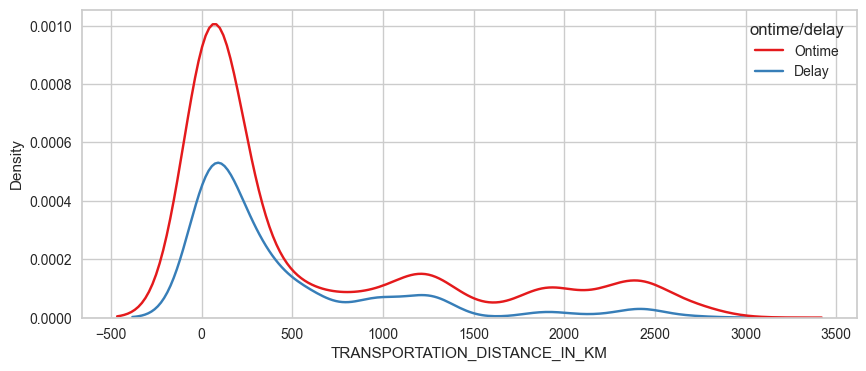

In [9]:
# function to show kde plot
def show_kde(data, list, hue, column=3, figsize=[15,6]):
    baris= math.ceil(len(list)/column)
    fig, ax = plt.subplots(baris,column, figsize=figsize)
    fig.tight_layout(h_pad=1.5)
    i=0
    j=0
    for col in list:
        sns.kdeplot(data=data, hue=hue, x = col, ax=ax[j][i], palette='Set1')
        i=i+1
        if i==column:
            i=0
            j=j+1
fig, ax = plt.subplots(figsize=[10,4])
sns.kdeplot(data=data_eda, hue='ontime/delay', x = 'TRANSPORTATION_DISTANCE_IN_KM', ax=ax, palette='Set1')

Dari grafik diatas, terlihat tidak ada perbedaan sebaran data jarak transportasi dengan keterlambatan pengiriman.

In [10]:
data_eda.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped', 'ontime/delay'],
      dtype='object')

### Jumlah pengiriman delay dan ontime berdasarkan market/Regular

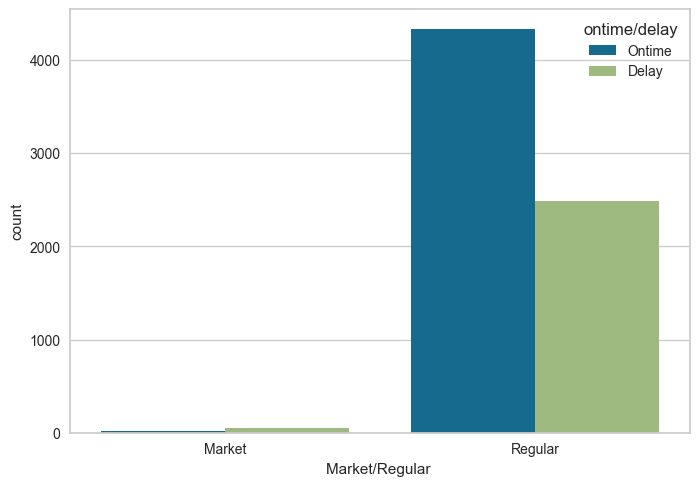

In [11]:
sns.countplot(data=data_eda, x='Market/Regular ', hue='ontime/delay');

Jika diliihat diatas pengiriman yang mengalami delay paling banyak terjadi pada pengiriman regular. Namun jika kita mempertimbangkan persentase, maka jumlah pengiriman market lah yang paling banyak mengamai delay jika dihitung secara persentase.

### Jumlah pengiriman delay dan ontime berdasarkan Jenis kendaraan

<Axes: xlabel='count', ylabel='vehicleType'>

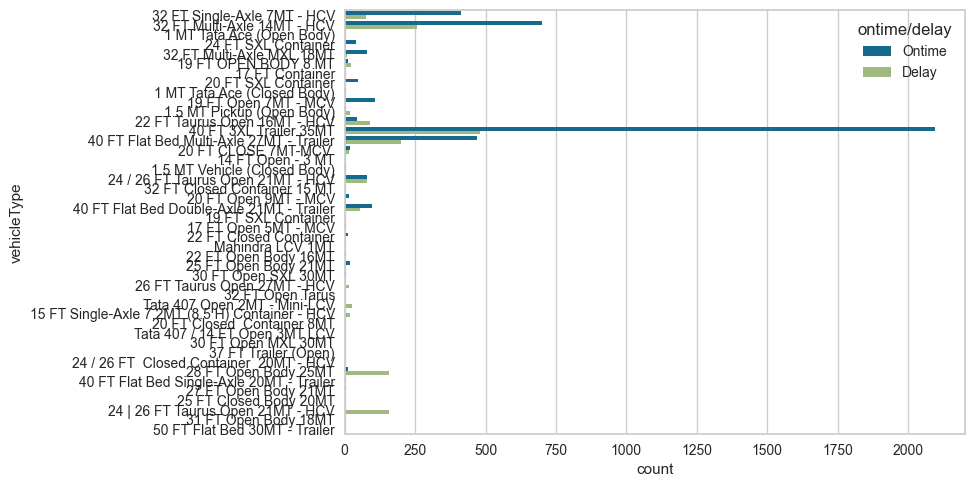

In [12]:
sns.countplot(data=data_eda, orient='v', y='vehicleType', hue='ontime/delay')

Jika dilihat pada grafik diatas, Bisa kita simpulkan bahwa Jenis kendaraan `40 FT 3XL Trailer 35 FT` adalah kendaraan yang paing banyak mengantarkan pesanan dengan tepat waktu. Kendaraan ini bisa menjadi kendaraan terbaik untuk digunakan sebagai pengiriman

### Korelasi antara jumlah order dan jumlah order delay berdasarkan hari paket diterima

In [13]:
#menghapus data jam pada BookiID_Date
data_eda['BookingID_Date']= data_eda['BookingID_Date'].dt.normalize()

In [14]:
#Menghitung jumlah pengiriman dan jumlah pengiriman yang mengalami delay berdasarkan tanggal
data_delay=data_eda.groupby(by='BookingID_Date').agg({'BookingID_Date':'count', 'delay': 'count'}).rename(columns={'BookingID_Date': 'order_quantity', 'delay':'late_deliveries_qty'})

In [15]:
#persentase pengiriman delay berdsarkan jumlah pengiriman
data_delay['late_deliveries_perc']= data_delay['late_deliveries_qty']/data_delay['order_quantity']


/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



<Axes: xlabel='order_quantity', ylabel='late_deliveries_perc'>

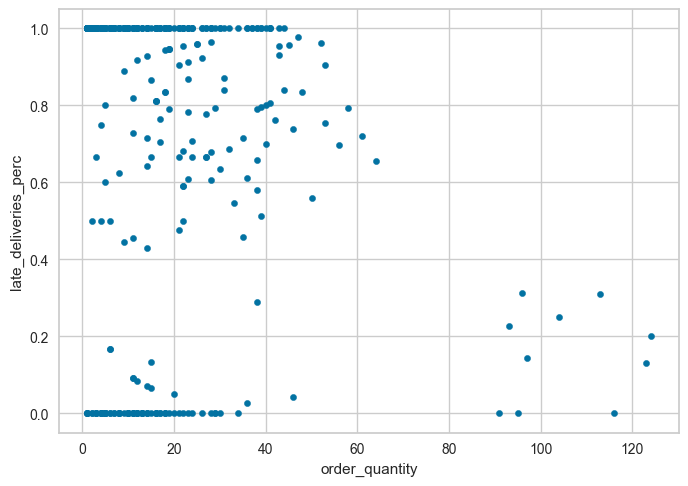

In [16]:
data_delay.plot.scatter(x='order_quantity', y='late_deliveries_perc')

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



<Axes: xlabel='order_quantity', ylabel='late_deliveries_qty'>

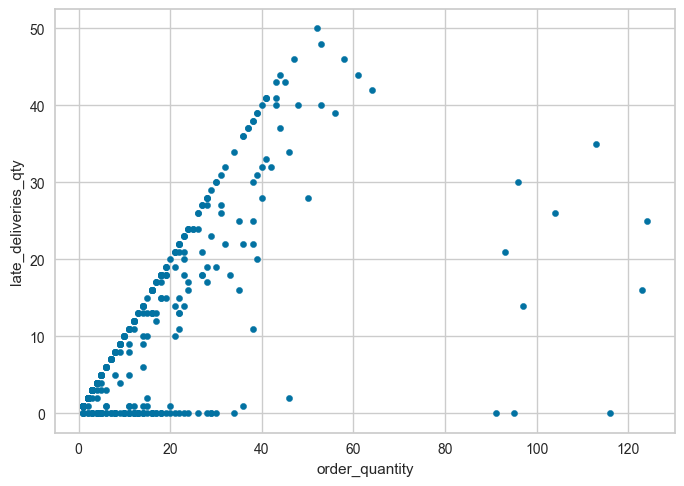

In [17]:
data_delay.plot.scatter(x='order_quantity', y='late_deliveries_qty')

In [18]:
data_delay[['order_quantity','late_deliveries_qty']].corr()

,order_quantity,late_deliveries_qty
order_quantity,1.000000,0.619291
late_deliveries_qty,0.619291,1.000000


Jika dilihat berdasarkan scatterplot dan nilai korelasi diatas ditemukan bahwa ada korelasi positif cukup kuat antara jumlah order yang diterima dengan jumlah pesanan yang mengalami keterlambatan. Ini artinya jika jumlah pesanan pada hari tersebut cukup banyak. maka sangat mungkin pengiriman yang yang terlamat juga meningkat

In [19]:
data_eda.corr(numeric_only=True)

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
Curr_lat,1.000000,0.014212,0.083046,0.080646,-0.123957
Curr_lon,0.014212,1.000000,-0.093686,0.049582,0.003564
TRANSPORTATION_DISTANCE_IN_KM,0.083046,-0.093686,1.000000,0.136589,-0.054293
Minimum_kms_to_be_covered_in_a_day,0.080646,0.049582,0.136589,1.000000,0.023964
Driver_MobileNo,-0.123957,0.003564,-0.054293,0.023964,1.000000


## Clasification

### Data Pre Processing

#### Feature Enginering and fitur selection

Saya merubah data `trip_end` dan `trend_start_eta` menjadi `longtrip_in_minutes` dengan menghitung selisih keduanya. Saya juga menghitung selisih waktu `BookingID_date` dan `Actual ETA` sebagai `delivery_time`

In [20]:
# data['long_trip_in_minutes']=(pd.to_datetime(data.trip_end_date) - pd.to_datetime(data.trip_start_date))/pd.Timedelta(minutes=1)
# data['delivery_time']=(pd.to_datetime(data.actual_eta) - pd.to_datetime(data.BookingID_Date))/pd.Timedelta(minutes=1)
# data['planned_delivery_time']=(pd.to_datetime(data.Planned_ETA) - pd.to_datetime(data.BookingID_Date))/pd.Timedelta(minutes=1)

In [21]:
data_train=data.copy()

In [22]:
data_train.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [24]:
data_train.drop(columns=['trip_end_date', 'trip_start_date', 'BookingID_Date', 'actual_eta', 'Planned_ETA'], inplace=True)

data ontime dan delay merupakan data yang sama, sehingga diputuskan untuk menghapus salah satunya untuk mengurangi redudansi data. Begitu juga dengan data Origin_Location dengan `Destination_Location` dengan `DestinationLocation` merupakan 2 kolom dengan 2 data yang sama dan perlu dihapus salah satunya. kedua kolom tersebut ditambahkan di list daftar kolom yang akan dihapus. `Data-Ping_time` merupakan data yang tidak relevan karena hanya berisi data kapan sistem menierima GPS ping. Begitu juga dengan `GPS provider`, hanya berisi data penyedia GPS  yang tidak relevan dengan optimaslisasi logistik. Fitur `Curr_lon`, `Curr_lat` juga dihapus karena hanya berisi data lokasi yang sudah cukup direpresentasikan dengan data `current location`

In [25]:
deletecolumn=['ontime','Destination_Location', 'Data_Ping_time', 'GpsProvider', 'Curr_lat', 'Curr_lon', 'Org_lat_lon','Des_lat_lon']
data_train.drop(columns=deletecolumn, inplace=True)
data_train

,BookingID,Market/Regular,vehicle_no,Origin_Location,Current_Location,DestinationLocation,delay,OriginLocation_Code,DestinationLocation_Code,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",R,CHEPUZTVSHUA1,HOSHOSALLCCA2,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",NaN,CHEORADMRCCB1,CHEMATDMROPA7,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",NaN,CHEORADMRCCB1,CHEMATDMROPA7,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",NaN,CHENETLUTCCA1,CHENETLUTCCA1,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,WDSBKTP42751,Regular,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","SGT Goods Shed Rd, Kadugodi, Bengaluru, Karnat...","Sahakaranagar P.O, Bangalore, Karnataka",NaN,V0045771,LE005870,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,WDSBKTP43203,Regular,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",NaN,V0045771,LE005419,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,WDSBKTP43021,Regular,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",NaN,V0048673,LE005848,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,WDSBKTP42685,Regular,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",R,V0048673,LEL04580,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


#### Get Data Inference

In [26]:
# separating data for inference
data_inf = data.sample(100, random_state=0)
data_train= data.drop(data_inf.index)

In [27]:
data_train.nunique()

GpsProvider                             29
BookingID                             6775
Market/Regular                           2
BookingID_Date                        5924
vehicle_no                            2310
Origin_Location                        180
Destination_Location                   518
Org_lat_lon                            173
Des_lat_lon                            520
Data_Ping_time                        3711
Planned_ETA                           6212
Current_Location                      2545
DestinationLocation                    518
actual_eta                            6632
Curr_lat                              4091
Curr_lon                              4058
ontime                                   1
delay                                    1
OriginLocation_Code                    177
DestinationLocation_Code               477
trip_start_date                       6025
trip_end_date                         4670
TRANSPORTATION_DISTANCE_IN_KM          563
vehicleType

Fitur Booking_ID dihapus karena memiliki jumlah data berbeda yang sangat unik dan tida relevan pada proses klasifikasi 

In [28]:
data_train.drop(columns='BookingID', inplace=True)

#### Missing Value

Periksa jumlah nilai yang hilang

In [29]:
data_train.isnull().sum().sort_values(ascending=False)/data_train.shape[0]

ontime                                0.628909
Driver_MobileNo                       0.608997
Minimum_kms_to_be_covered_in_a_day    0.590708
Driver_Name                           0.498525
delay                                 0.369617
Current_Location                      0.140708
Curr_lon                              0.139086
Curr_lat                              0.139086
GpsProvider                           0.139086
Data_Ping_time                        0.139086
vehicleType                           0.120354
TRANSPORTATION_DISTANCE_IN_KM         0.103540
trip_end_date                         0.027876
actual_eta                            0.005457
DestinationLocation_Code              0.003982
OriginLocation_Code                   0.000442
Origin_Location                       0.000000
supplierNameCode                      0.000000
supplierID                            0.000000
customerNameCode                      0.000000
customerID                            0.000000
BookingID_Dat

Kolom `Minimum_kms_to_be_covered_in_a_day` dan `Driver_MobileNo`  dihapus karena memiliki percentage missing value yang sangat banyak bahkan lebih dari 50%.. Sedangkan missing value pada data `driver name` diganti dengan unknown dan missing value pada fiturn, `current_location`, dan `vehicel type` diiai dengan nilai modus. Missing value pada fitur delay merupakan representasi dari keterangan bahwa pengiriman terserbut terkirim ontime. Agar lebih mudah value pada fotur delay akan diganti dengan nilai `0` dan `1`. Nilai `1` merepresentasikan pengiriman yang telat dan `0` untuk merepresentasikan pengiriman yang ontime

In [30]:
data_train.drop(columns=['Minimum_kms_to_be_covered_in_a_day', 'Driver_MobileNo', 'OriginLocation_Code', 'DestinationLocation_Code', 'supplierID'], inplace=True)

In [31]:
data_train['Driver_Name'].fillna('Unknown', inplace=True)
data_train[ 'vehicleType'].fillna(data_train['vehicleType'].mode()[0], inplace=True)
data_train['Current_Location'].fillna(data_train['Current_Location'].mode()[0], inplace=True)

In [32]:
data_train['delay']=data_train.delay.replace({np.NaN, 'R'}, {0, 1})

In [33]:
data_train.isnull().sum().sort_values(ascending=False)/data_train.shape[0]

ontime                           0.628909
GpsProvider                      0.139086
Data_Ping_time                   0.139086
Curr_lon                         0.139086
Curr_lat                         0.139086
TRANSPORTATION_DISTANCE_IN_KM    0.103540
trip_end_date                    0.027876
actual_eta                       0.005457
Destination_Location             0.000000
delay                            0.000000
supplierNameCode                 0.000000
customerNameCode                 0.000000
customerID                       0.000000
Driver_Name                      0.000000
vehicleType                      0.000000
trip_start_date                  0.000000
BookingID_Date                   0.000000
Org_lat_lon                      0.000000
vehicle_no                       0.000000
Market/Regular                   0.000000
DestinationLocation              0.000000
Current_Location                 0.000000
Planned_ETA                      0.000000
Origin_Location                  0

Periksa jumlah baris data yag memiliki missing value

In [34]:
data_train.isnull().sum().sort_values(ascending=False)/data_delay.shape[0]

ontime                           10.989691
GpsProvider                       2.430412
Data_Ping_time                    2.430412
Curr_lon                          2.430412
Curr_lat                          2.430412
TRANSPORTATION_DISTANCE_IN_KM     1.809278
trip_end_date                     0.487113
actual_eta                        0.095361
Destination_Location              0.000000
delay                             0.000000
supplierNameCode                  0.000000
customerNameCode                  0.000000
customerID                        0.000000
Driver_Name                       0.000000
vehicleType                       0.000000
trip_start_date                   0.000000
BookingID_Date                    0.000000
Org_lat_lon                       0.000000
vehicle_no                        0.000000
Market/Regular                    0.000000
DestinationLocation               0.000000
Current_Location                  0.000000
Planned_ETA                       0.000000
Origin_Loca

In [35]:
#Jumlah data yang ada nilai null
data_train.isnull().any(axis=1).sum()

5335

Baris data yag masih memiliki missing value dihapus

In [36]:
data_train = data_train.dropna()

#### Outliers Handle

Data Outlier Ditangani dengan Library Wisorizer. Penanganan outlier dilakukan dengan 2 cara yaitu metode **Z Score** dan **Iqr**. Data berdistribusi Gausian akan ditangani dengan skor z dimana batas atas dan batas bawahnya adalah `mean +- 3 x standar deviasi`. Sedangkan data skew ditangani menggunakan metode IQR dengan batas atas dan batas bawah adalah `mean +- 3 x interquatile`.

In [37]:
data_train.TRANSPORTATION_DISTANCE_IN_KM.skew()

1.793302188241007

Karena data `TRANSPORTATION_DISTANCE_IN_KM` memiliki nilai skew lebih dari `0,5` maka data tersebut merupakan data dengan distribusi skew positif. Data skew ditangani denganmetode IQR dengan batas atas adalah mean +- 3 x interquartil

**Before handling outliers**

In [38]:
data_train.TRANSPORTATION_DISTANCE_IN_KM.describe().T

count    1445.000000
mean      483.212561
std       613.168313
min         3.000000
25%        70.000000
50%       215.000000
75%       620.000000
max      2723.000000
Name: TRANSPORTATION_DISTANCE_IN_KM, dtype: float64

In [39]:
data_train=Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['TRANSPORTATION_DISTANCE_IN_KM'], missing_values='ignore').fit_transform(data_train)

**After handling outliers**

In [40]:
data_train.TRANSPORTATION_DISTANCE_IN_KM.describe().T

count    1445.000000
mean      475.777370
std       589.506892
min         3.000000
25%        70.000000
50%       215.000000
75%       620.000000
max      2270.000000
Name: TRANSPORTATION_DISTANCE_IN_KM, dtype: float64

#### Scalling & Encoding

Data scaling is carried out using 2 methods, namely the Minmax scaler method and the standard scaler method. Standard scaler for normally distributed data. Meanwhile, the Minmax scaler is for skew distributed data.

Encoding is also carried out for categorical data which only consists of 1 column, namely the education column. The encoder used is an ordinal encoder. The ordinal encoder was chosen because the education column is ordinal data. This means that each category in the `education` feature has a level.

In [47]:
# col_num=['TRANSPORTATION_DISTANCE_IN_KM','long_trip_in_minutes','delivery_time','planned_delivery_time' ]
col_num=['TRANSPORTATION_DISTANCE_IN_KM']
col_cat=['Market/Regular ',
 'vehicle_no',
 'Origin_Location',
 'Current_Location',
 'DestinationLocation',
 'delay',
 'vehicleType',
 'Driver_Name',
 'customerID',
 'customerNameCode',
 'supplierNameCode',
 'Material Shipped'
]

The encoding and scaling process for features is carried out using the pipeline below:

In [112]:
#make column transform for scaling & encoding
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0))])

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, col_cat),
        ('num', numeric_transformer, col_num)])


In [49]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['Market/Regular ', 'vehicle_no',
                                  'Origin_Location', 'Current_Location',
                                  'DestinationLocation', 'delay', 'vehicleType',
                                  'Driver_Name', 'customerID',
                                  'customerNameCode', 'supplierNameCode',
                                  'Material Shipped']),
                                ('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['TRANSPORTATION_DISTANCE_IN_KM'])])

In [50]:
# encoding & scaling process
preprocessor.fit(data_train)
data_train_temp=preprocessor.transform(data_train)
df=pd.DataFrame(data=data_train_temp, columns=col_cat+col_num)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Market/Regular,1445.0,0.967474,0.177454,0.0,1.000000,1.000000,1.000000,1.0
vehicle_no,1445.0,276.840138,139.842130,0.0,149.000000,311.000000,394.000000,503.0
Origin_Location,1445.0,31.333564,22.444256,0.0,11.000000,29.000000,45.000000,83.0
Current_Location,1445.0,339.931488,169.049187,0.0,200.000000,369.000000,480.000000,598.0
DestinationLocation,1445.0,51.352249,34.452964,0.0,22.000000,57.000000,78.000000,125.0
delay,1445.0,0.011765,0.107863,0.0,0.000000,0.000000,0.000000,1.0
vehicleType,1445.0,21.341176,4.594559,0.0,22.000000,23.000000,23.000000,27.0
Driver_Name,1445.0,257.051211,127.949842,0.0,172.000000,261.000000,376.000000,463.0
customerID,1445.0,8.610381,6.653975,0.0,4.000000,6.000000,13.000000,26.0
customerNameCode,1445.0,9.620761,6.517937,0.0,5.000000,8.000000,14.000000,27.0


> All data is **successfully** scaled & encoded.

#### Dimension Reduction

##### Score VIF

In [51]:
# VIF value for each features

vif_data = pd.DataFrame()
vif_data["feature"] = col_cat+col_num

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_train_temp, i)
						for i in range(len(df.columns))]
vif_data.sort_values(by='VIF', ascending=False)


,feature,VIF
9,customerNameCode,768.446294
8,customerID,652.466120
0,Market/Regular,21.092722
6,vehicleType,20.423310
1,vehicle_no,6.446408
4,DestinationLocation,5.826961
3,Current_Location,5.081340
7,Driver_Name,4.798949
2,Origin_Location,4.667724
10,supplierNameCode,3.814707


> Nilai VIF yang lebih dari 5 mempunyai 8 kolom. Berdasarkan VIF kita dapat mengubah jumlah fitur menjadi `8` fitur.

##### Elbow Method

Tujuan dari melihat metode elbow adalah agar kita mengetahui dimana posisi **paling optimal** dari jumlah fitur, yaitu ketika penambahan jumlah fitur selanjutnya tidak membawa informasi yang lebih banyak secara signifikan.

In [52]:
pca = PCA()
pca.fit(data_train_temp)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

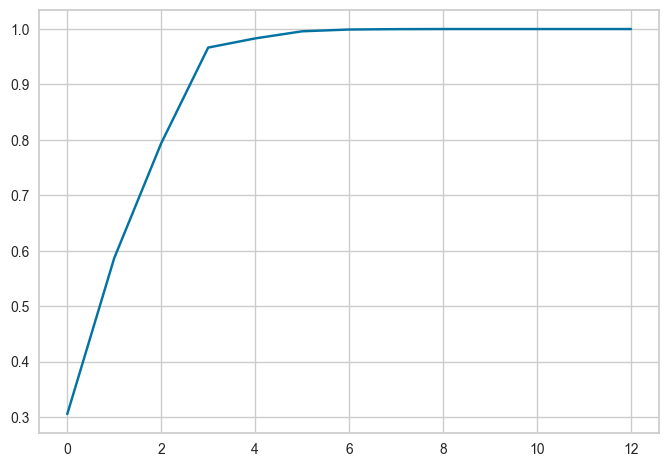

In [53]:
# show elbow plot

pca=PCA()
pca.fit(data_train_temp)
cumsum = np.cumsum(pca.explained_variance_ratio_)
pcaplot=sns.lineplot(data=cumsum)
pcaplot.grid(True)


>Catatan: jumlah cluster adalah sumbu x

Berdasarkan metode siku saya menyimpulkan bahwa `5` fitur sudah cukup untuk membawa informasi.

In [54]:
print('Jumlah informasi yang dibawa adalah ', cumsum[5]*100,'%')

Jumlah informasi yang dibawa adalah  99.59062049369255 %


5 features do not carry 99% of the information from the train data.

**Kesimpulan**

Berdasarkan VIF dan Elbow, diputuskan jumlah fitur setelah direduksi adalah 5 mengingat jumlah fitur dengan nilai 5 sudah bisa menghasilkan 99% dan tidak akan ada perubahan yang berarti jika lebih dari 5 fitur.

In [55]:
# Reduksi feature menjadi 6
pca = PCA(n_components=5)
final_pipe_preprocessing=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca)
])
data_train_final=final_pipe_preprocessing.fit_transform(data_train)

#make data visual pca 2d
data_visual_train=PCA(n_components=2).fit_transform(data_train_temp)

### Clustering

Clustering is carried out using 4 methods, namely the **K-Means, Spectral, DB Scan** and **Aglomeratove** methods

##### K-Means

**Chosing n-cluster**

Sebelum melakukan Clustering, terlebih dahulu kita perlu menganalisis jumlah cluster yang optimal. Jumlah pasti cluster dianalisis dengan 2 cara, yaitu `elbow methode` dan `Shilouete Visualization`. Metode Elbow kami menggunakan 2 matriks, yaitu `shiloutte` dan `distortion.` Skor distorsi berfokus pada jarak antara data dan centroid. Sedangkan skor siluet mempertimbangkan jarak antara data dengan centroidnya, data dengan centoid lain di dekatnya, dan antara centroid dengan centroid lainnya.

**Elbow Methode**

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

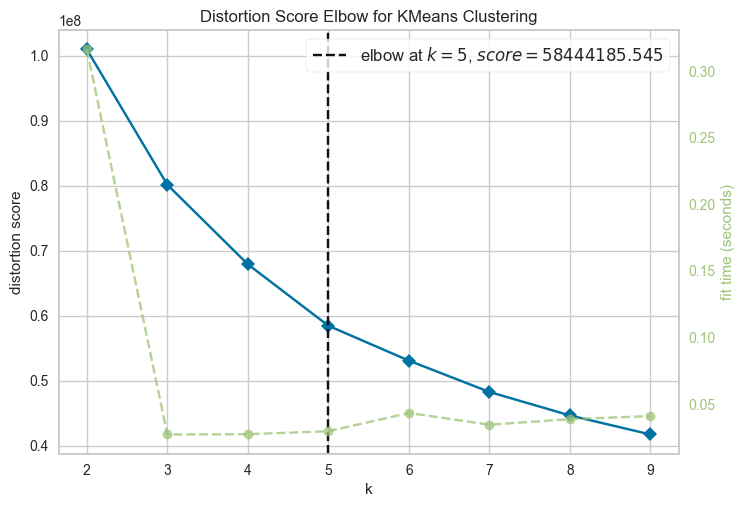

In [56]:
# Show ELbow distortion Plot 
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_train_final)
Elbow_M.show();

pada grafik diatas, elbow dengan berdasarkan metrik distorsi memberikan rekomendasi **4 cluster**. Sedangkan berdasarkan skor siluet, elbow merekomendasikan **3 cluster**. Agar kita bisa memilih lebih detail, kita bisa menggunakan visualisasi siluet untuk mempertimbangkan kembali jumlah cluster.

**Silhouette Visualizatiom**

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



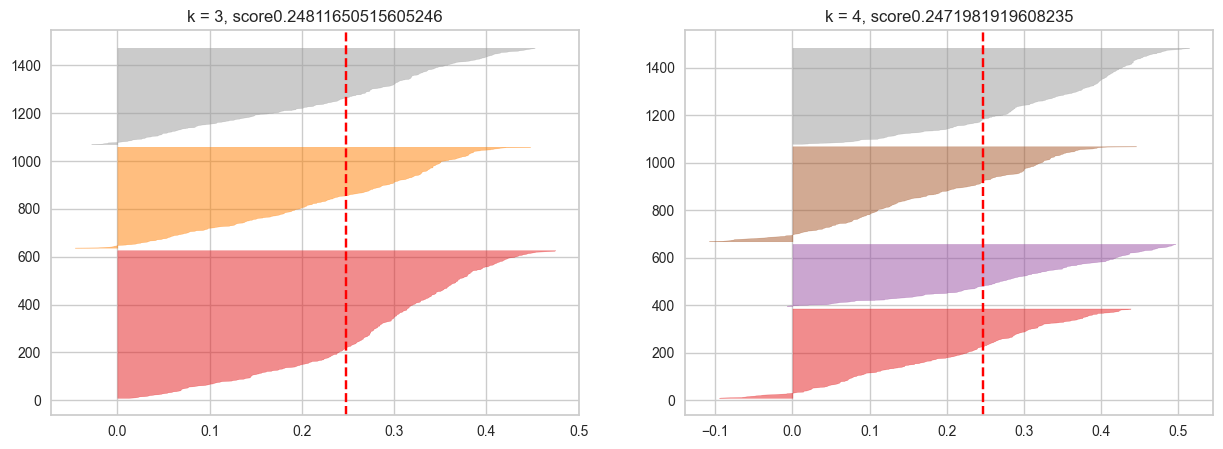

In [57]:
# menampilkan plot siluet
i=0
j=0
fig, ax=plt.subplots(1,2, figsize=[15,5])
fig.subplots_adjust( wspace=0.2, hspace=0.1)
for k in [3,4]:
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=26), ax=ax[i])
    visualizer.fit(data_train_final)
    visualizer.set_title("k = "+ str(k) + ', score'+ str(visualizer.silhouette_score_))
    i=i+1

Jika dilihat dari 2 visualisasi siluet di atas, cluster 3 dan 4 sama-sama bagus. Namun saya memutuskan untuk memilih 3 cluster.

**Model Definition, Train & Predict**

Based on the elbow results and silhouette score evaluation, cluster number 2 is the most optimal cluster.

In [58]:
# model definition
km_clust=KMeans(n_clusters=3, random_state=26)

#train model
km_clust.fit(data_train_final)

#predict
clust_km=km_clust.predict(data_train_final)

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Plotting**

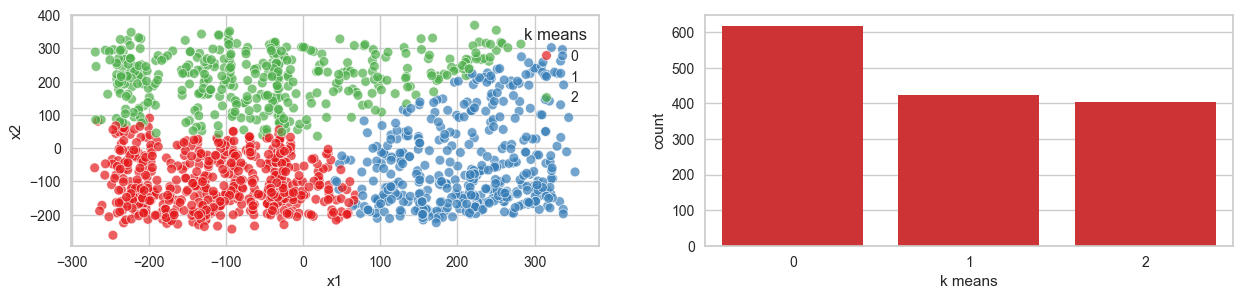

In [59]:
# set palet color
sns.set_palette('Set1')

# save clustering result
data_train['k means']=clust_km

#visualisasi clustering in 2 dimention
data_train_visual=pd.DataFrame(data=data_visual_train, columns=['x1', 'x2'])
data_train_visual['k means']=clust_km

# Plotting  hasil predict in 2d
fig, ax=plt.subplots(1,2, figsize=[15,3])
sns.scatterplot(data=data_train_visual, x='x1', y='x2', hue='k means', alpha=0.7, palette='Set1', ax=ax[0])
sns.countplot(data=data_train_visual, x='k means', ax=ax[1]);

The data was successfully clustered/segmented into 3 clusters. Kmeans succeeded in clustering well because the distribution shape matched the k means model. If we look at the data visualized in 2 dimensions, there are 3 pieces of data gathered to form a circle. K means is very good at recognizing these patterns.

Cluster number 1 is the most dominant cluster.

##### Aglomeratif Clustering

**Coosing n-cluster**

Agglomerative Clustering merupakan salah satu clustering yang bersifat hierarkis. Untuk membantu menentukan jumlah cluster yang optimal, kita dapat memeriksa hasil dendogram.
Untuk membuat data dendogram dan menentukan jumlah cluster yang optimal, saya menggunakan perpustakaan clusteval. (sumber [di sini](https://pypi.org/project/clusteval/2.0.4/))

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 36.81it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=6926.151. Be patient now..
[clusteval] >INFO> Compute cluster labels.


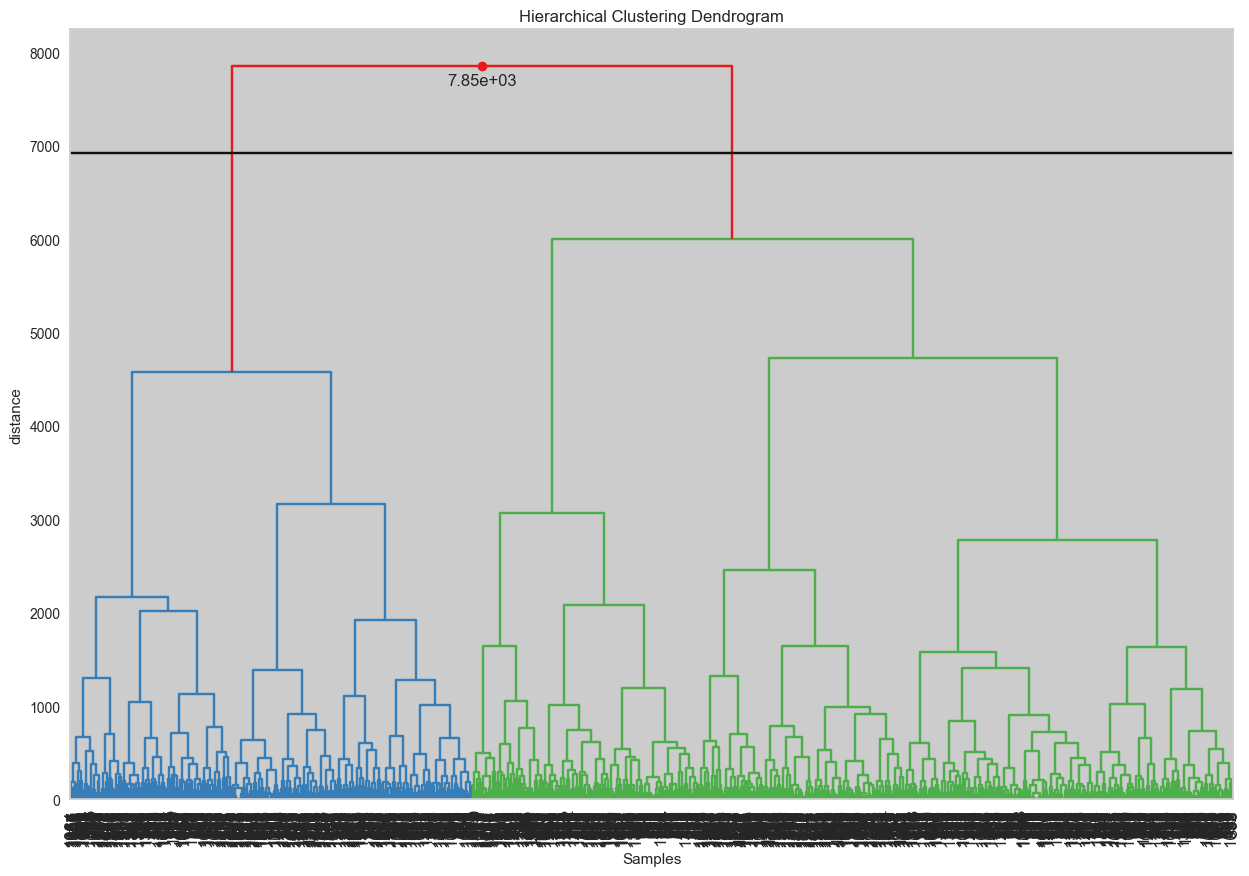

In [60]:
ce = clusteval(linkage='ward')
ce.fit(data_train_final)
ce.dendrogram();

The dendogram results show that the optimal number of clusters is 2 with the maximum distance between each cluster not being much different (seen from the first branch in each cluster).

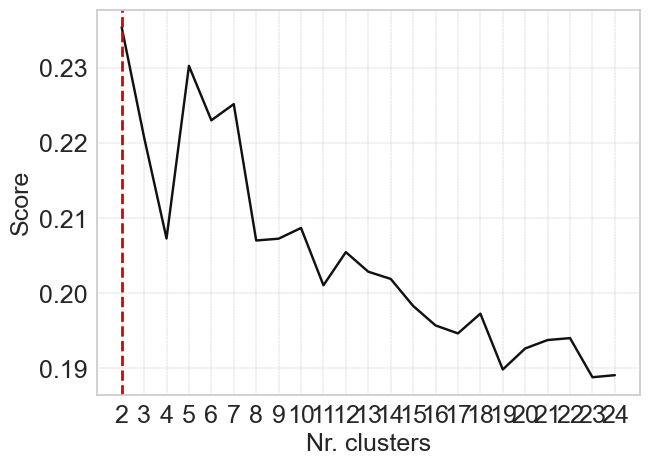

In [61]:
# skor siluet setiap cluster
ce.plot(figsize=(7,5));

Berdasarkan skor siluet kita dapat menentukan bahwa aglomeratif akan optimal pada `2 cluster`.

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


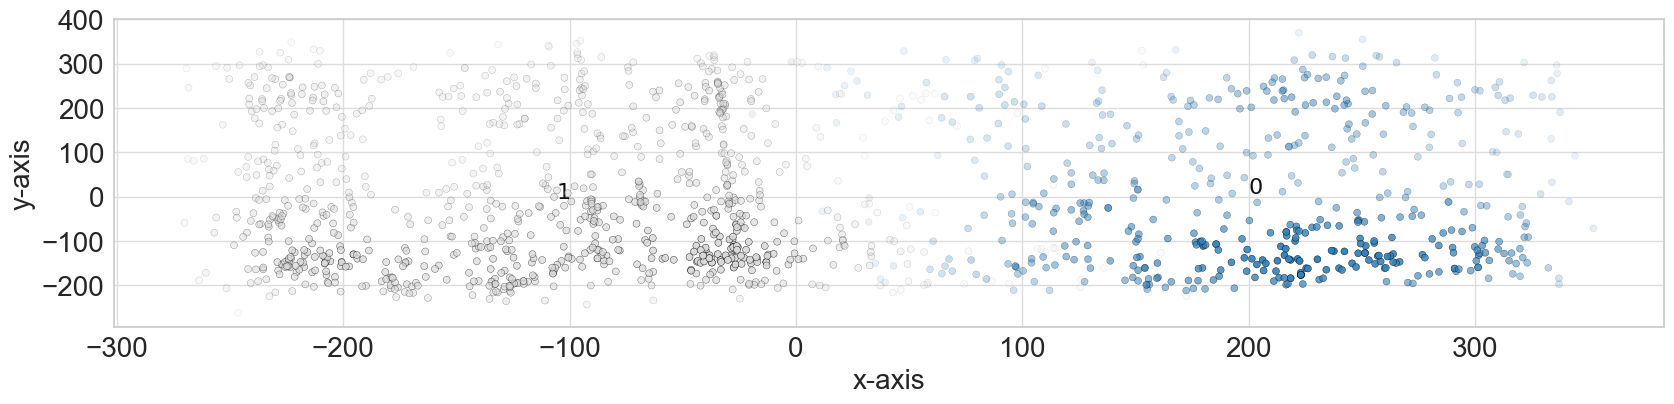

In [62]:
# scatter plot clustering
ce.scatter(data_train_final, figsize=(20, 4));

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



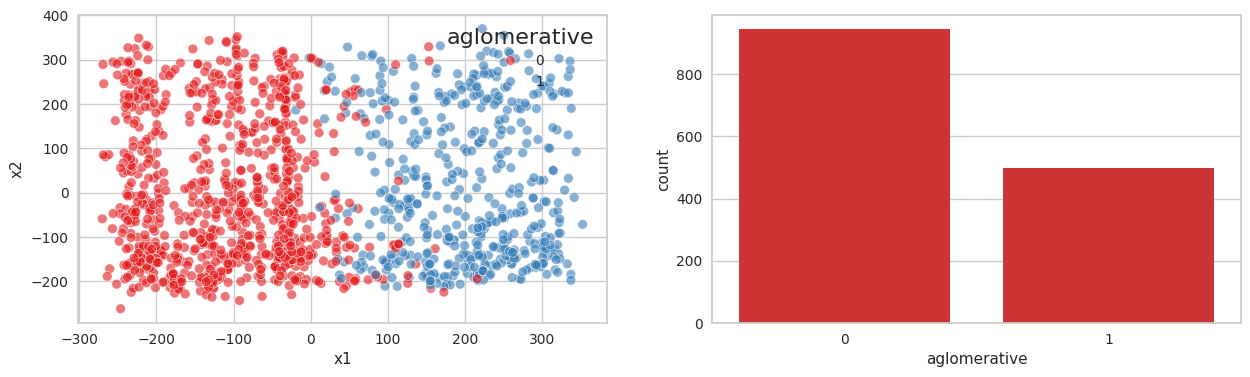

In [63]:
# plotting manual
aglo=AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='ward')
data_train_visual['aglomerative']=data_train['aglomerative'] = aglo.fit_predict(data_train_final)
fig, ax=plt.subplots(1,2, figsize=[15, 4])
scatter=sns.scatterplot(data=data_train_visual, x='x1', y='x2', hue='aglomerative', alpha=.6, palette="Set1", ax=ax[0]);
count=sns.countplot(data=data_train_visual, x = 'aglomerative', ax=ax[1])

Hasil dari klasifikasi yang telah dilakukan. terdapat jenis klasifikasi yang berhasil dibuat. Kalsifikasi pertama merupakan klasifikasi kmeans dengan 3 cluster dan klasifikasi alomeratif dengan 2 cluster.

## Create Model Machine learning

Mesin learning yang digunakan saya usulkan 2 hal.
1. Mesin learning yang dapat digunakan untuk memprediksijumlah order di masa depan.
2. Mesin learning yang dapat digunakan untuk memperkirakan apakah pesanan tersebut mengalami delay atau tidak

### Data preparation

Data preparation pada data pembuatan model machine learning tidak jauh berbeda dengan saat proses klasifikasi. Perbedannya hanya terletak pada pemisahan `X` dan `y` saja

In [80]:
X = data_train.drop(columns='delay')
y = data_train[['delay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

**Scalling dan Encoding**

In [81]:

col_num=['TRANSPORTATION_DISTANCE_IN_KM']
col_cat=['Market/Regular ',
 'vehicle_no',
 'Origin_Location',
 'Current_Location',
 'DestinationLocation',
 'vehicleType',
 'Driver_Name',
 'customerID',
 'customerNameCode',
 'supplierNameCode',
 'Material Shipped'
]

In [117]:
#make column transform for scaling & encoding
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999))])

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, col_cat),
        ('num', numeric_transformer, col_num)])


In [88]:
#Training data with rando forest
X_train_final=preprocessor.fit_transform(X_train)
ranfor=RandomForestClassifier().fit(X_train_final, y_train)
#show the feature importance value
fitur_importance=pd.Series(data=ranfor.feature_importances_, index=col_cat+col_num) 
fitur_importance.sort_values(ascending=False)

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



vehicle_no                       0.169857
TRANSPORTATION_DISTANCE_IN_KM    0.165599
Material Shipped                 0.164267
Current_Location                 0.148945
DestinationLocation              0.088564
Driver_Name                      0.071419
supplierNameCode                 0.064077
Origin_Location                  0.059793
vehicleType                      0.038405
customerNameCode                 0.016598
customerID                       0.010506
Market/Regular                   0.001971
dtype: float64

berdasarkan hasil diatas, saya memilih meggunakan data yang memiliki imprtance skor lebih dari 0,03

In [99]:
# fitur yangdipilih
feature_selected=[ 'vehicle_no',
 'Origin_Location',
 'Current_Location',
 'DestinationLocation',
 'vehicleType',
 'Driver_Name',
 'supplierNameCode',
 'Material Shipped'
]

In [118]:
preprocessor_final = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, feature_selected),
        ('num', numeric_transformer, col_num)])


X_train_final=preprocessor_final.fit_transform(X_train)
X_test_final=preprocessor_final.transform(X_test)

In [129]:
LR=LogisticRegression(max_iter=1000)
LR.fit(X_train_final, y_train)

/Users/wahyudiwahyudi/anaconda3/envs/technicaltest/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=1000)

In [130]:
y_train_pred=LR.predict(X_train_final)
y_test_pred=LR.predict(X_test_final)
y_train_pred=np.where(y_train_pred>0.5,1,0)
y_test_pred=np.where(y_test_pred>0.5,1,0)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1141
           1       0.75      0.20      0.32        15

    accuracy                           0.99      1156
   macro avg       0.87      0.60      0.66      1156
weighted avg       0.99      0.99      0.99      1156

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       287
           1       0.01      0.50      0.02         2

    accuracy                           0.58       289
   macro avg       0.50      0.54      0.37       289
weighted avg       0.99      0.58      0.73       289

